In [2]:
from warnings import filterwarnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder
from textblob import Word, TextBlob
from wordcloud import WordCloud

filterwarnings('ignore')
pd.set_option("display.max_columns",None)
pd.set_option("display.width",200)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [3]:
### Metin Ön İşleme (Text Preprocessing) ###

# Amazonda bir ürüne yapılan verileri içeren dataframe
df = pd.read_csv("amazon_reviews.csv", sep=",")
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",No issues.,4.00,Four Stars,1406073600,2014-07-23,138,0,0
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]","Purchased this for my device, it worked as adv...",5.00,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",it works as expected. I should have sprung for...,4.00,nothing to really say....,1356220800,2012-12-23,715,0,0
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",This think has worked out great.Had a diff. br...,5.00,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]","Bought it with Retail Packaging, arrived legit...",5.00,best deal around,1373673600,2013-07-13,513,0,0


In [4]:
## Normalizing Case Folding ##
df['reviewText'] = df['reviewText'].str.lower() # Tüm cümleleri küçülttük.
df['reviewText']

0                                              no issues.
1       purchased this for my device, it worked as adv...
2       it works as expected. i should have sprung for...
3       this think has worked out great.had a diff. br...
4       bought it with retail packaging, arrived legit...
                              ...                        
4910    i bought this sandisk 16gb class 10 to use wit...
4911    used this for extending the capabilities of my...
4912    great card that is very fast and reliable. it ...
4913    good amount of space for the stuff i want to d...
4914    i've heard bad things about this 64gb micro sd...
Name: reviewText, Length: 4915, dtype: object

In [5]:
# Noktalama İşlemleri (Punctuations) ##
df['reviewText'] = df['reviewText'].str.replace('[^\w\s]', '', regex=True)
df['reviewText']

# Regular Expression araştır #

0                                               no issues
1       purchased this for my device it worked as adve...
2       it works as expected i should have sprung for ...
3       this think has worked out greathad a diff bran...
4       bought it with retail packaging arrived legit ...
                              ...                        
4910    i bought this sandisk 16gb class 10 to use wit...
4911    used this for extending the capabilities of my...
4912    great card that is very fast and reliable it c...
4913    good amount of space for the stuff i want to d...
4914    ive heard bad things about this 64gb micro sd ...
Name: reviewText, Length: 4915, dtype: object

In [6]:
## Sayılar (Numbers) ##
df['reviewText'] = df['reviewText'].str.replace('[\d]', '', regex=True)
df['reviewText']

0                                               no issues
1       purchased this for my device it worked as adve...
2       it works as expected i should have sprung for ...
3       this think has worked out greathad a diff bran...
4       bought it with retail packaging arrived legit ...
                              ...                        
4910    i bought this sandisk gb class  to use with my...
4911    used this for extending the capabilities of my...
4912    great card that is very fast and reliable it c...
4913    good amount of space for the stuff i want to d...
4914    ive heard bad things about this gb micro sd ca...
Name: reviewText, Length: 4915, dtype: object

In [7]:
## Stop Words ##
import nltk

# İngilizce stopwords listesini yükleme
#nltk.download('stopwords')
sw = stopwords.words('english')
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [8]:
# Dilde yaygın kullanılan ölçüm özelliği taşımayan ifadeler silindi.
df['reviewText'] = df['reviewText'].apply(lambda x: " ".join(x for x in str(x).split() if x not in sw))
df['reviewText']

0                                                  issues
1       purchased device worked advertised never much ...
2       works expected sprung higher capacity think ma...
3       think worked greathad diff bran gb card went s...
4       bought retail packaging arrived legit orange e...
                              ...                        
4910    bought sandisk gb class use htc inspire months...
4911    used extending capabilities samsung galaxy not...
4912    great card fast reliable comes optional adapte...
4913          good amount space stuff want fits gopro say
4914    ive heard bad things gb micro sd card crapping...
Name: reviewText, Length: 4915, dtype: object

In [9]:
## Rare Words (Nadir Kelimeler) ##
temp_df = pd.Series(' '.join(df['reviewText']).split()).value_counts()
temp_df

card          4603
gb            1725
phone         1685
works         1559
great         1445
              ... 
sharper          1
cheapos          1
gate             1
measuring        1
stealwould       1
Name: count, Length: 9701, dtype: int64

In [10]:
# Frekansı 1'e eşit ve 1'den küçük
drops = temp_df[temp_df <= 1] # 5612 tane

df['reviewText'] = df['reviewText'].apply(lambda x: " ".join(x for x in x.split() if x not in drops))
df['reviewText']

0                                                  issues
1       purchased device worked advertised never much ...
2       works expected higher capacity think made bit ...
3       think worked gb card went south one held prett...
4       bought retail packaging arrived legit envelope...
                              ...                        
4910    bought sandisk gb class use htc inspire months...
4911    used capabilities samsung galaxy note greatly ...
4912    great card fast reliable comes optional adapte...
4913          good amount space stuff want fits gopro say
4914    ive heard bad things gb micro sd card crapping...
Name: reviewText, Length: 4915, dtype: object

In [11]:
## Cümleleri Token'larına (Parçalarına) Ayrımak (Tokenization) ##

#nltk.download('punkt')
df['reviewText'].apply(lambda x: TextBlob(x).words).head()

0                                             [issues]
1    [purchased, device, worked, advertised, never,...
2    [works, expected, higher, capacity, think, mad...
3    [think, worked, gb, card, went, south, one, he...
4    [bought, retail, packaging, arrived, legit, en...
Name: reviewText, dtype: object

In [12]:
## Lemmatization (Kelimeleri Köklerine Ayrıma) ##
#nltk.download('wordnet')

df['reviewText'] = df['reviewText'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df['reviewText']

# Stemming bu da bir köklerine ayırma işlemidir buna da bakalım.

0                                                   issue
1       purchased device worked advertised never much ...
2       work expected higher capacity think made bit e...
3       think worked gb card went south one held prett...
4       bought retail packaging arrived legit envelope...
                              ...                        
4910    bought sandisk gb class use htc inspire month ...
4911    used capability samsung galaxy note greatly ex...
4912    great card fast reliable come optional adapter...
4913           good amount space stuff want fit gopro say
4914    ive heard bad thing gb micro sd card crapping ...
Name: reviewText, Length: 4915, dtype: object

In [13]:
## Metin Görselleştirme (Text Visualization) ##

tf = df['reviewText'].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index() # Kelime frekansı
tf.columns = ["words", "tf"]
tf.sort_values("tf",ascending=False)

,words,tf
27,card,5537.00
14,work,2044.00
7,phone,1909.00
39,gb,1756.00
98,great,1445.00
...,...,...
2721,sizethe,2.00
2719,everybody,2.00
2717,lived,2.00
3687,chkdsk,2.00


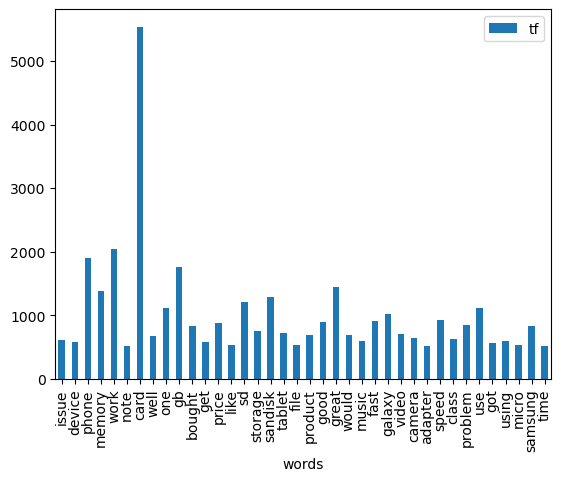

In [14]:
# Barplot 
tf[tf["tf"]  > 500].plot.bar(x="words", y="tf")
plt.show()

In [15]:
## Kelime Bulutu (Word Cloud) ##

# Tüm reviewtextleri tek bir text haline getiriyoruz

text = " ".join(i for i in df.reviewText)

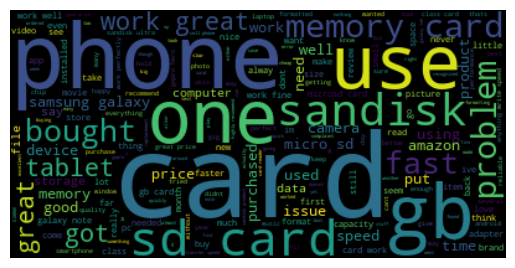

In [16]:
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

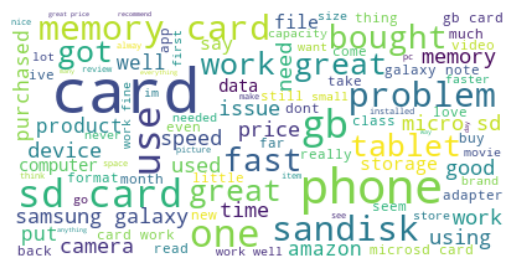

In [17]:
wordcloud = WordCloud(max_font_size=50,
                      max_words=100,
                      background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [18]:
# Şablonlara Göre Wordcloud 
"""
(Bir resim içerisine kelimeleri yerleştiriyoruz örnekte türk bayrağı fotoğrafına koyulmuştur)

tr_mask = np.array(Image.open("tr.png"))

wc = WordCloud(background_color="white",
               max_words=1000,
               contour_width=3,
               contour_color="firebrick")

wc.generate(text)
plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()
"""

'\n(Bir resim içerisine kelimeleri yerleştiriyoruz örnekte türk bayrağı fotoğrafına koyulmuştur)\n\ntr_mask = np.array(Image.open("tr.png"))\n\nwc = WordCloud(background_color="white",\n               max_words=1000,\n               contour_width=3,\n               contour_color="firebrick")\n\nwc.generate(text)\nplt.figure(figsize=[10,10])\nplt.imshow(wc, interpolation="bilinear")\nplt.axis("off")\nplt.show()\n'

In [19]:
### Sentiment Analysis (Duygu Durum Analizi) ### 
# nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()
sia.polarity_scores("The film was awesome")
sia.polarity_scores("I liked this music but it is not good as the other one")

{'neg': 0.207, 'neu': 0.666, 'pos': 0.127, 'compound': -0.298}

In [20]:
df["reviewText"][0:10].apply(lambda x: sia.polarity_scores(x))
df["reviewText"][0:10].apply(lambda x: sia.polarity_scores(x)["compound"])

0   0.00
1   0.00
2   0.40
3   0.65
4   0.86
5   0.00
6   0.87
7   0.82
8   0.00
9   0.92
Name: reviewText, dtype: float64

In [21]:
df["polarity_score"] = df["reviewText"].apply(lambda x: sia.polarity_scores(x)["compound"]) # Tüm yorumlara uyguladık
df["polarity_score"].tail(10) # Son 10 yorum

4905    0.77
4906    0.36
4907   -0.23
4908    0.81
4909    0.62
4910    0.08
4911    0.18
4912    0.85
4913    0.69
4914    0.53
Name: polarity_score, dtype: float64

In [22]:
### Sentiment Modeling (Duygu Durum Modelleme) ###

## Feature Engineering ##
df["sentiment_label"] = df["reviewText"].apply(lambda x: "pos" if sia.polarity_scores(x)["compound"] > 0 else "neg") # Label ekledik
df["sentiment_label"].tail(10)
df["sentiment_label"].value_counts()

sentiment_label
pos    3944
neg     971
Name: count, dtype: int64

In [23]:
# Pos ve Neg labellarına göre puan ortalamaları
df.groupby("sentiment_label")["overall"].mean()

sentiment_label
neg   4.09
pos   4.71
Name: overall, dtype: float64

In [24]:
# Pos ve Neg olan label işaretlerini 1 ve 0 değerlerine dönüştürdük
df["sentiment_label"] = LabelEncoder().fit_transform(df["sentiment_label"])

In [25]:
y = df["sentiment_label"] # Bağımlı Değişken Label
x = df["reviewText"] # Bağımsız Değişken (Metin ama)

In [26]:
# Count Vectors: frekasn temsilleri (Kelimelerin frekanslarının çıkartılması)
# TF-IDF Vectors: normalize edilmiş frekans temsilleri
# Word Embeddings (Word2Vec, GloVe, BERT vs)

# Bu yöntemlerin her birisi bilgisayarın liner-cebir dünyasında metinleri matematiksel işlemlere koymak için kullanılır.

# words
# kelimelerin nümerik temsilleri

# characters
# karakterlerin nümerik temsilleri

In [27]:
# ngram
a = """ Bu örneği anlaşılabilmesi için daha uzun bir metin üzerinde göstereceğim.
N-gram'lar birlikte kullanılan kelimelerin kombinasyonlarını gösterir ve feature üretmek için kullanılır"""

TextBlob(a).ngrams(3)

[WordList(['Bu', 'örneği', 'anlaşılabilmesi']),
 WordList(['örneği', 'anlaşılabilmesi', 'için']),
 WordList(['anlaşılabilmesi', 'için', 'daha']),
 WordList(['için', 'daha', 'uzun']),
 WordList(['daha', 'uzun', 'bir']),
 WordList(['uzun', 'bir', 'metin']),
 WordList(['bir', 'metin', 'üzerinde']),
 WordList(['metin', 'üzerinde', 'göstereceğim']),
 WordList(['üzerinde', 'göstereceğim', "N-gram'lar"]),
 WordList(['göstereceğim', "N-gram'lar", 'birlikte']),
 WordList(["N-gram'lar", 'birlikte', 'kullanılan']),
 WordList(['birlikte', 'kullanılan', 'kelimelerin']),
 WordList(['kullanılan', 'kelimelerin', 'kombinasyonlarını']),
 WordList(['kelimelerin', 'kombinasyonlarını', 'gösterir']),
 WordList(['kombinasyonlarını', 'gösterir', 've']),
 WordList(['gösterir', 've', 'feature']),
 WordList(['ve', 'feature', 'üretmek']),
 WordList(['feature', 'üretmek', 'için']),
 WordList(['üretmek', 'için', 'kullanılır'])]

In [28]:
## Count Vectors ##
"""
Bağımsız değişkenler (X) diye bir şey yok metin var. Bu metnin içerisinden feature'lar üretmem lazım.
Ölçülebilirlik özelliğe sahip, matematiksel işlemlere sokulabilecek olacak bazı featurelar.
"""
from sklearn.feature_extraction.text import CountVectorizer

corpus = ['This is the first document.',
          'This document is the second document.',
          'And this is the third one',
          'Is this the first document?']

vectorizer = CountVectorizer()
X_c = vectorizer.fit_transform(corpus)
vectorizer.get_feature_names()
# ['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']
# Eşsiz kelimeleri çıkardık.
X_c.toarray()
# Eşsiz kelimeler cümlelerde var mı yok mu? 1 ve 0'lar ordan geliyor
# Geçme frekanslarını sayarak

array([[0, 1, 1, 1, 0, 0, 1, 0, 1],
       [0, 2, 0, 1, 0, 1, 1, 0, 1],
       [1, 0, 0, 1, 1, 0, 1, 1, 1],
       [0, 1, 1, 1, 0, 0, 1, 0, 1]], dtype=int64)

In [29]:
# n-gram frekans ile yapalım
vectorizer2 = CountVectorizer(analyzer='word',ngram_range=(2,2))
X_n = vectorizer2.fit_transform(corpus)
vectorizer2.get_feature_names()
X_n.toarray()
# 2 li 2 li kelime öbekleri oluşturduk
# Bunların frekansları nedir?

"""
Özet olarak count vector yöntemi kelimelerin, karakterlerin ya da n-gramların frekanslarını sayar.
Böylece elimizdeki metni ölçülebilir bir formata getirir.
"""

'\nÖzet olarak count vector yöntemi kelimelerin, karakterlerin ya da n-gramların frekanslarını sayar.\nBöylece elimizdeki metni ölçülebilir bir formata getirir.\n'

In [30]:
# Kendi metnimize uyguladık
vectorizer = CountVectorizer()
X_count = vectorizer.fit_transform(x)
vectorizer.get_feature_names()[10:15] # ['access', 'accessed', 'accessible', 'accessing', 'accessory']
X_count.toarray()[10:15]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [31]:
## TF-IDF Yöntemi ##
"""
Bir kelime vektörü oluşturma yöntemidir. 
Kelimelerin dökümanlarda geçme frekansını ve kelimelerin bütün 
corpusta geçme frekansları odağında bir işlem yapılır.

TF -> Term Frequency -> t teriminin ilgili dökümandaki frekansı / dökümandaki toplam terim sayısı
IDF -> Inverse Document Frequency -> 1 + loge((toplam döküman sayısı + 1) / (içinde t terimi olan döküman sayısı+1))
"""

from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_word_vectorizer = TfidfVectorizer() 
X_tf_idf_word = tf_idf_word_vectorizer.fit_transform(x) # Kelime (Word) temelli yapmak istiyorum

tf_idf_ngram_vectorizer = TfidfVectorizer(ngram_range=(2, 3))
X_tf_idf_ngram = tf_idf_ngram_vectorizer.fit_transform(x) # Ngram temelli yapmak istiyorum

In [32]:
## Sentiment Modeling ##
"""
1.Text Preprocessing
2.Text Visualization
3.Sentiment Analysis
4.Feature Engineering
5.Sentiment Modeling
"""

# Logistic Regression #
log_model = LogisticRegression().fit(X_tf_idf_word, y)
cross_val_score(log_model, X_tf_idf_word, y, scoring="accuracy", cv=5).mean() # Çarpraz Doğrulama Tahmin Başarısı 0.830111902339776

new_review = pd.Series("this product is great") # Yeni bir yorum gelsin
new_review2 = pd.Series("looking bad") # Yeni bir yorum gelsin
new_review = TfidfVectorizer().fit(x).transform(new_review) # Veriyi diğer verilere benzettik ki model anlasın
new_review2 = TfidfVectorizer().fit(x).transform(new_review2) # Veriyi diğer verilere benzettik ki model anlasın
log_model.predict(new_review) # array([1])
log_model.predict(new_review2) # array([0])

random_review = pd.Series(df["reviewText"].sample(1).values) # Veri içinden rastgele bir yorum
random_review = TfidfVectorizer().fit(x).transform(random_review)
log_model.predict(random_review) # array([1])

array([1])

In [33]:
# Random Forest #

# Count Vectors
rf_model = RandomForestClassifier().fit(X_count,y)
cross_val_score(rf_model, X_count, y, cv=5, n_jobs=-1).mean() # 0.8413

# TF-IDF Word-Level
rf_model = RandomForestClassifier().fit(X_tf_idf_word, y)
cross_val_score(rf_model, X_tf_idf_word, y, cv=5, n_jobs=-1).mean() # 0.8274

# TF-IDF N-GRAM
rf_model = RandomForestClassifier().fit(X_tf_idf_ngram, y)
cross_val_score(rf_model, X_tf_idf_ngram, y, cv=5, n_jobs=-1).mean() # 0.7863

0.7855544252288912

In [34]:
# Hiperparametre Optimizasyonu # 
rf_model = RandomForestClassifier(random_state=17)

rf_params = {"max_depth":[8,None],
             "max_features":[7,"auto"],
             "min_samples_split":[2,5,8],
             "n_estimators":[100,200]}

rf_best = GridSearchCV(rf_model,rf_params,cv=5,n_jobs=-1,verbose=True).fit(X_count,y)

print(rf_best.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
{'max_depth': None, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 100}


In [35]:
# Final Model #
rf_final = rf_model.set_params(**rf_best.best_params_, random_state=17).fit(X_count,y)
cross_val_score(rf_final,X_count,y,cv=5,n_jobs=-1).mean()

0.8408952187182095